$~$

# **Introduction to Regression with statsmodels in Python**
____
$~$

### Notes from the course [Introduction to Regression with statsmodels in Python](https://www.datacamp.com/courses/introduction-to-regression-with-statsmodels-in-python)

$~$

____

*Learning how to make predictions from a dataset, quantify model performance, and diagnose problems with model fit.*

Learning objetives:
+ Simple Linear Regression Modeling 
+ Predictions and model objects
+ Assessing model fit
+ Simple Logistic Regression Modeling

$~$
___

$~$

## Simple Linear Regression Modeling 

$~$

$~$

+ terminology:


    + **The response variable (Y):**, the one you want to make predictions on, is also known as the dependent variable or the y variable. (These two terms are completely interchangeable). 
    
    + **Explanatory variables (X):**, used to explain how the predictions will change, are also known as independent variables or x variables (these terms are interchangeable)

    + **Linear regression:** is used when the response variable is numeric, like in the motor insurance dataset. 
    
    + **Logistic regression:** is used when the response variable is logical. That is, it takes True or False values

    + **The intercept:** is the *y* value when *x* is zero. 
    + **The slope:** is the steepness of the line, equal to the amount *y* increases if you increase *x* by one. (The slope tells you by how much the response variable is expected to change if the explanatory variable increases by one unit.)
    + **The equation** for a straight line is that the *y* value is the intercept plus the slope times the *x* value.
        + *y* = intercept + slope *  *x*
        
        $~$

    + **Regression to the mean**: "*extreme cases don't persist over time*". it is a property of the data, not a type of model, but linear regression can be used to quantify its effect. 
    
    + **The coefficient of determination(r-squered):** I t's written with a lower case r for simple linear regression and an upper case R when you have more than one explanatory variable

        + 1 means you have a perfect fit
        + 0  means your model is no better than randomness
        
        $~$

    + **Residual standard error (RSE):**  It has the same unit as the response variable. Each residual is the difference between a predicted value and an observed value.

    + **Root-mean-square error (RMSE):**

_____
$~$

+ tips:

    + Before you start running regression models, it's a good idea to visualize your dataset. To visualize the relationship between two numeric variables, you can use a **scatter plot**
    + Add a trend line to the scatter plot.
$~$ 

$~$

## Predictions and model objects

$~$

In [2]:
import pandas as pd
import kaggle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

from statsmodels.formula.api import ols

sns.set_context("talk")
plt.style.use('ggplot')



*I am going to reproduce the exercises all exercises of the course, but using a different dataset*
___
$~$

For this exercice we are going to use this [Seoul Real Estate Datasets](https://www.kaggle.com/datasets/jcy1996/seoul-real-estate-datasets?select=seoul+-+SeoulRealEstate.csv)

$~$
___

### Downloading and cleaning the dataset:

$~$

In [3]:
PATH = "./data"

In [4]:
if not os.path.exists(PATH):
    os.makedirs(PATH)
if not os.listdir(PATH):
    !kaggle datasets download -d "argonalyst/sao-paulo-real-estate-sale-rent-april-2019" --unzip -p $PATH


In [5]:

files = [os.path.join(PATH, f) for f in os.listdir(PATH)]
for f in files:
    print(f)


./data/sao-paulo-properties-april-2019.csv


In [6]:
df = pd.read_csv(files[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [7]:
df.head()


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [8]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')

In [9]:
# # remove spaces in columns name (chance the name of the columns)
# df.columns = df.columns.str.replace(' ','_')
# df.columns = df.columns.str.replace('/','_')
# df.columns = df.columns.str.replace('\n','_')
# df.columns = df.columns.str.replace('(','_')
# df.columns = df.columns.str.replace(')','_')



# #transfor "Sale Price_bid_price" to type int64
# df["Sale_Price_bid_price"] = pd.to_numeric(df["Sale_Price_bid_price"].str.replace('[^.0-9]', ''))
# #transfor year type to int
# df["yearBuilt"] = pd.to_numeric(df["yearBuilt"])
# print(df.yearBuilt.describe())

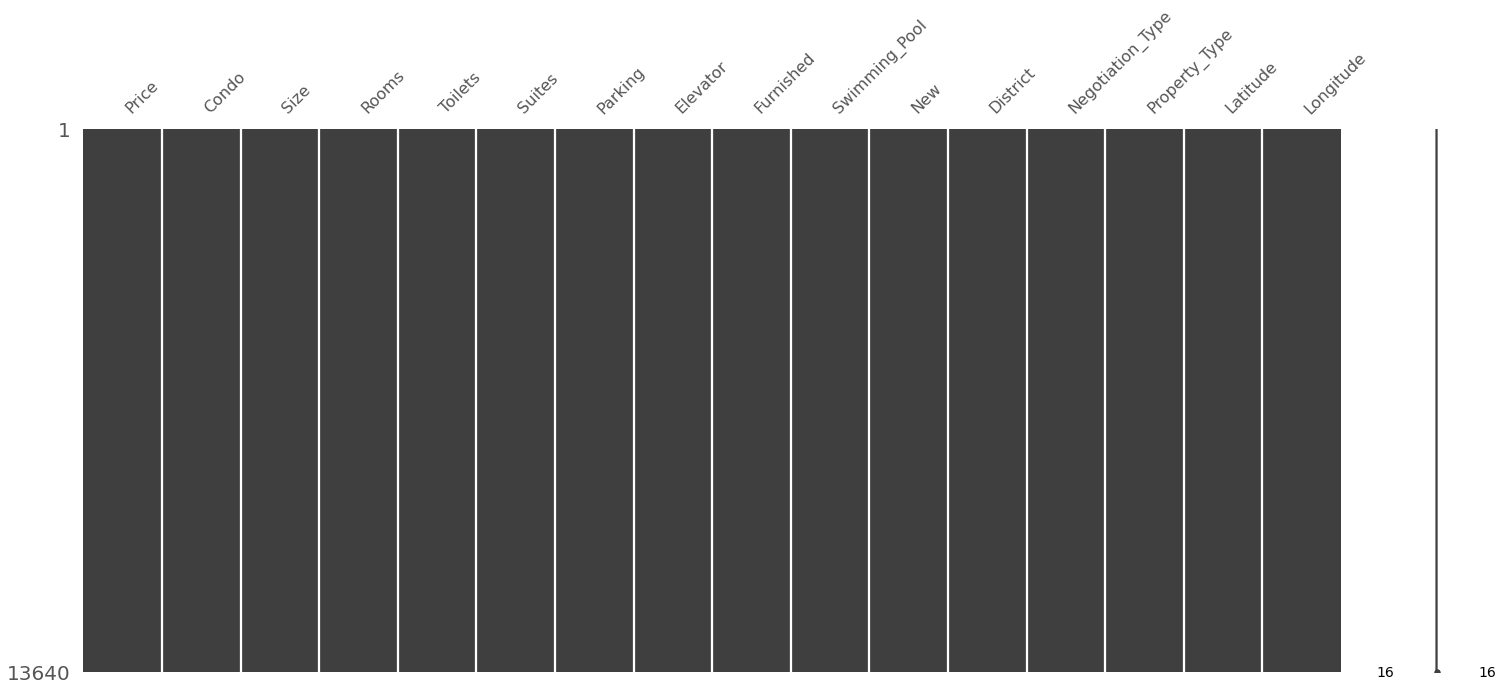

In [10]:
#cheking for missing values:
msno.matrix(df)
plt.show()


In [11]:
# check for the Missing values by column:
df.isnull().sum()


Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming_Pool       0
New                 0
District            0
Negotiation_Type    0
Property_Type       0
Latitude            0
Longitude           0
dtype: int64

___

### Visualizing two numeric variables:

$~$

*Scatter plots are the standard way to visualize the relationship between two numeric variables*


$~$
let's define our target variable:


+ Y = "Sale Price/bid price"

$~$

from here we can draw a plot of our target variable versus any other numeric variable:

$~$



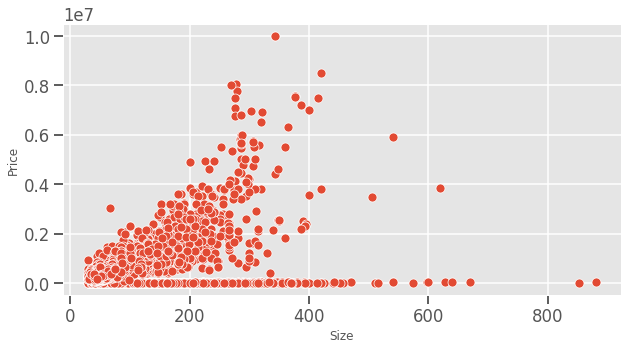

In [12]:
# Draw the scatter plot
 
fig = plt.figure(figsize=(10,5))
_ = sns.scatterplot(x="Size", y="Price",data=df)
plt.show()

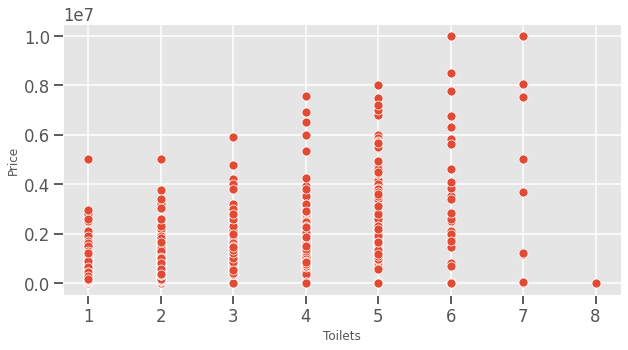

In [13]:
# Draw the scatter plot
 
fig = plt.figure(figsize=(10,5))
_ = sns.scatterplot(x="Toilets", y="Price",data=df)
plt.show()

$~$

Draw a trend line on the scatter plot:

$~$


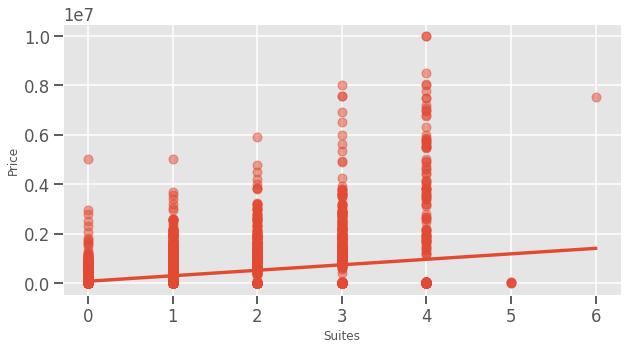

In [14]:
fig = plt.figure(figsize=(10,5))

sns.regplot(x="Suites",
         y="Price",
         data=df,
         ci=None,
         scatter_kws={'alpha': 0.5})
plt.show()

$~$

### Linear regression with ols(): Price vs Elevator

$~$

In [15]:
# Create the model object

regres_1 = ols("Price ~ Elevator", data=df)
# Fit the model

regres_1 = regres_1.fit()

# Print the parameters of the fitted model

print(regres_1.params)


Intercept    242894.557157
Elevator     126611.802602
dtype: float64


$~$

### Categorical explanatory variables:

$~$


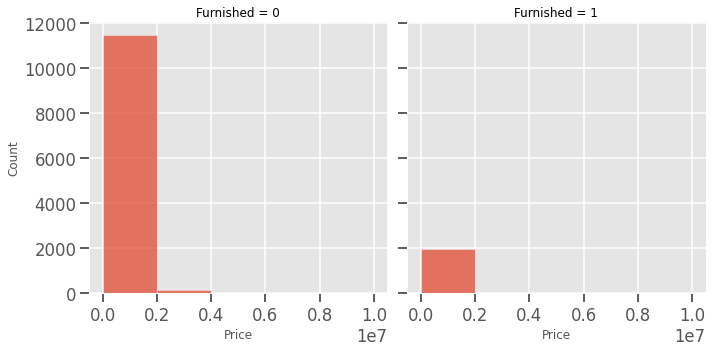

In [16]:
# Histograms of Sale_Price_bid_price with 10 bins, split by decade

_= sns.displot(data=df, x="Price",
            col="Furnished",
            bins=5)

# Show the plot
plt.show()


$~$

It appears that funished houses are the most expensive on average, and non funished  ones are the cheapest.

$~$

$~$

### Calculating means by category

$~$


In [17]:
# Calculate the mean of price, grouped by funished
mean_price_by_funished = df.groupby("Furnished")["Price"].mean()

# Print the result
print(mean_price_by_funished)

Furnished
0    289302.363207
1    278642.594905
Name: Price, dtype: float64


$~$

### Linear regression with a categorical explanatory variable

$~$


In [18]:
# Create the model, fit it
price_vs_funished = ols("Price ~ Negotiation_Type", data=df).fit()

# Print the parameters of the fitted model
print(price_vs_funished.params)

Intercept                     3077.669065
Negotiation_Type[T.sale]    605546.470985
dtype: float64


In [19]:
# Create the model, fit it
price_vs_funished = ols("Price ~ Furnished ", data=df).fit()

# Print the parameters of the fitted model
print(price_vs_funished.params)

Intercept    289302.363207
Furnished    -10659.768302
dtype: float64


In [20]:
# Update the model formula to remove the intercept

price_vs_funished = ols("Price ~ Furnished +0 ", data=df).fit()

# Print the parameters of the fitted model
print(price_vs_funished.params)

Furnished    278642.594905
dtype: float64


In [22]:
# Update the model formula to remove the intercept

price_vs_funished = ols("Price ~ Size +0 ", data=df).fit()

# Print the parameters of the fitted model
print(price_vs_funished.params)

Size    3545.149382
dtype: float64


In [23]:
# Calculate the mean of price, grouped by funished
mean_price_by_funished = df.groupby("Furnished")["Price"].mean()

# Print the result
print(mean_price_by_funished)

Furnished
0    289302.363207
1    278642.594905
Name: Price, dtype: float64


$~$

**The coefficient of the model is just the means**

$~$


$~$

## Predictions and model objects

$~$

$~$


Print the fitted values:


$~$


In [24]:
print(price_vs_funished.fittedvalues)

0        166622.020970
1        159531.722206
2        170167.170353
3        170167.170353
4        194983.216029
             ...      
13635    180802.618500
13636    262341.054294
13637    404147.029588
13638    138260.825912
13639    155986.572823
Length: 13640, dtype: float64


In [25]:
print(regres_1.fittedvalues)

0        242894.557157
1        242894.557157
2        242894.557157
3        242894.557157
4        369506.359760
             ...      
13635    242894.557157
13636    242894.557157
13637    242894.557157
13638    242894.557157
13639    242894.557157
Length: 13640, dtype: float64


$~$

Print the residuals:

$~$

In [26]:
print(regres_1.resid)

0       -241964.557157
1       -241894.557157
2       -241894.557157
3       -241894.557157
4       -368206.359760
             ...      
13635     22105.442843
13636    302105.442843
13637    272105.442843
13638    102105.442843
13639    -80907.557157
Length: 13640, dtype: float64


$~$

Print the summary:

$~$

In [27]:
print(regres_1.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x12e364bb0>>


$~$

### Transforming the variables
$~$

In [28]:
df["sqrt_size"] = np.sqrt(df["Size"])
df["sqrt_price"] = np.sqrt(df["Price"])

<AxesSubplot:xlabel='sqrt_size', ylabel='sqrt_price'>

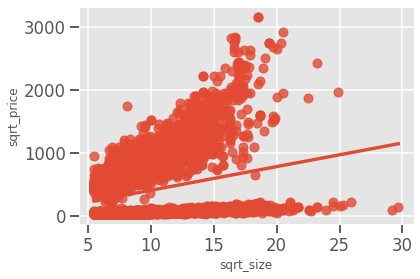

In [29]:
sns.regplot(x="sqrt_size", y="sqrt_price", data=df,
            ci=None)


In [30]:
# Create the model, fit it
sqrprice_vs_sqrt_size = ols("sqrt_price ~ sqrt_size ", data=df).fit()

# Print the parameters of the fitted model
print(sqrprice_vs_sqrt_size.params)

Intercept    29.892146
sqrt_size    37.580328
dtype: float64


$~$

##  Assessing model fit 

$~$

$~$

+ the coeff of determination is a measure of how well the linear regression line fits the observed values:

$~$

In [31]:
print(regres_1.rsquared)
print(price_vs_funished.rsquared) #Funished explains 2,63% of the variability in price of clicks.


0.010505160016888948
0.30656232173954656


$~$

+ Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.
$~$

In [32]:
# Calculate mse_orig for price_vs_funished
mse_orig = price_vs_funished.mse_resid

# Calculate rse_orig for price_vs_funished and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)


RSE of original model:  547242.4243601714


$~$

### Visualizing model fit:

$~$

+ **Residuals vs. fitted**: use the **residplot function from seaborn**. It takes the usual x, y, and data arguments, in addition to the lowess argument. This will add a smooth curve following the data, visualizing the trend of your residuals.

$~$

+ **Q-Q plot**: set the **residuals** of the model as your data argument and the fit argument to True.

$~$

+ **Scale-location plot**:

$~$


$~$

### Drawing diagnostic plots

$~$

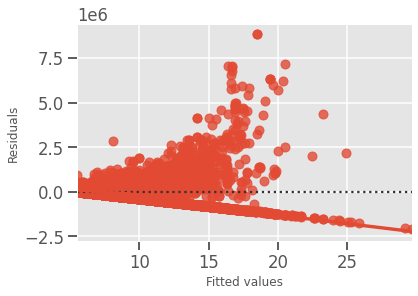

In [33]:
# Plot the residuals vs. fitted values
sns.residplot(x="sqrt_size", y="Price", data=df, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

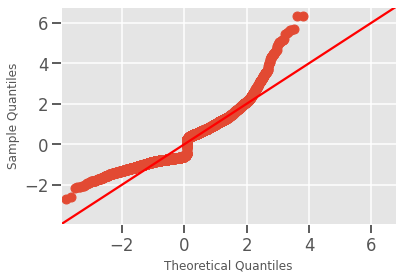

In [34]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=sqrprice_vs_sqrt_size.resid, fit=True, line="45")

# Show the plot
plt.show()

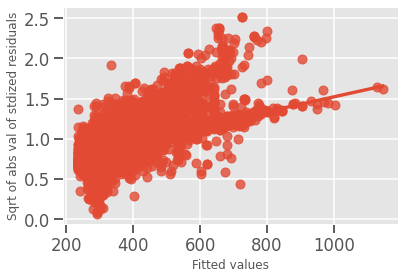

In [35]:
# Preprocessing steps
model_norm_residuals = sqrprice_vs_sqrt_size.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=sqrprice_vs_sqrt_size.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

$~$

### Outliers, leverage, and influence:

$~$

$~$

+ Leverage: measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset.

$~$

+ influence: Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

$~$

### Extracting leverage and influence

$~$

In [38]:
# Create summary_info
summary_info = sqrprice_vs_sqrt_size.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
df["leverage"] = summary_info ["hat_diag"]

# Sort taiwan_real_estate by leverage in descending order and print the head
df.sort_values("leverage", ascending=False).head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude,sqrt_size,sqrt_price,leverage
3865,19900,7800,880,5,4,5,6,1,0,0,0,Morumbi/São Paulo,rent,apartment,-23.623140,-46.719525,29.664794,141.067360,0.004900
10698,8700,5040,852,7,6,5,6,1,0,1,0,Morumbi/São Paulo,rent,apartment,-26.922512,-49.060707,29.189039,93.273791,0.004683
3408,50000,5500,670,5,6,5,7,0,0,1,0,Campo Belo/São Paulo,rent,apartment,-23.625617,-46.674614,25.884358,223.606798,0.003308
10669,30000,8800,640,4,5,4,5,0,1,1,0,Moema/São Paulo,rent,apartment,-23.599839,-46.664336,25.298221,173.205081,0.003090
3800,25000,7500,627,4,5,4,6,0,0,1,0,Moema/São Paulo,rent,apartment,-23.605854,-46.655442,25.039968,158.113883,0.002996


In [40]:
# Create summary_info
summary_info = sqrprice_vs_sqrt_size.get_influence().summary_frame()

# Add the hat_diag column to df, name it leverage
df["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to df, name it cooks_dist
df["cooks_dist"] = summary_info ["cooks_d"]

# Sort df by cooks_dist in descending order and print the head.

df.sort_values("cooks_dist", ascending=False).head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude,sqrt_size,sqrt_price,leverage,cooks_dist
7249,8500000,7200,420,4,6,4,4,1,0,1,0,Jardim Paulista/São Paulo,sale,apartment,-23.564044,-46.660862,20.493902,2915.475947,0.001587,0.024093
6282,10000000,0,343,4,7,4,5,0,0,0,0,Iguatemi/São Paulo,sale,apartment,-23.585487,-46.681676,18.520259,3162.277660,0.001119,0.022502
6287,9979947,0,343,4,6,4,5,1,0,1,0,Iguatemi/São Paulo,sale,apartment,-23.585487,-46.681676,18.520259,3159.105411,0.001119,0.022444
8799,7500000,7428,415,4,5,4,5,0,0,1,0,Jardim Paulista/São Paulo,sale,apartment,-23.568565,-46.655269,20.371549,2738.612788,0.001556,0.019923
8764,5900000,4690,540,4,3,2,4,1,1,1,0,Itaim Bibi/São Paulo,sale,apartment,-23.585155,-46.686608,23.237900,2428.991560,0.002383,0.018844


$~$

##   Simple Logistic Regression Modeling 

$~$

$~$

When the response variable is logical, all the points lie on the and lines, making it difficult to see what is happening This can be solved with a histogram of the explanatory variable, grouped by the response.

$~$

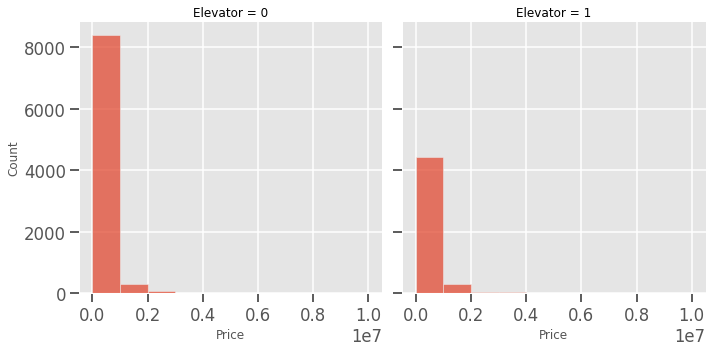

In [61]:
# Create the histograms of time_since_last_purchase split by Furnished
sns.displot(data=df,
            x="Price",
            col="Elevator", bins=10)

plt.show()

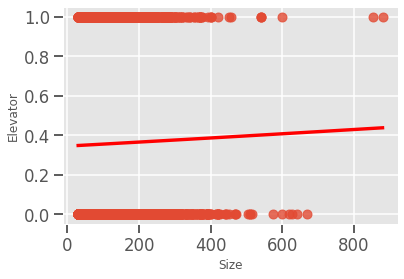

In [62]:
# Draw a linear regression trend line and a scatter plot of Size vs Elevator
sns.regplot(data=df,y="Elevator",x="Size",ci=None,logistic=True,
            line_kws={"color": "red"})

plt.show()

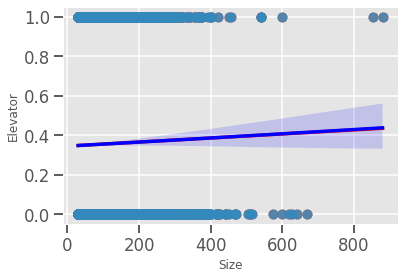

In [63]:
# Draw a linear regression trend line and a scatter plot of Size vs. Elevator
sns.regplot(x="Size",
            y="Elevator",
            data=df, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of Size vs. Elevator
sns.regplot(x="Size",
            y="Elevator",
            data=df, 
           
            line_kws={"color": "blue"},
            logistic=True)


plt.show()

In [64]:
from statsmodels.formula.api import logit

elevator_vs_size= logit("Elevator ~ Size", data=df).fit()
print(elevator_vs_size.params)


Optimization terminated successfully.
         Current function value: 0.649918
         Iterations 4
Intercept   -0.638189
Size         0.000443
dtype: float64


$~$

### Predictions and odds ratios:

$~$

$~$

+ Probabilities:

$~$

There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

$~$

$~$

### Quantifying logistic regression fit:

$~$

$~$

+ Accuracy: This is the proportion of correct predictions. That is, the number of true negatives plus the true positives, divided by the total number of observations. Higher accuracy is better

$~$

+ Sensitivity: This is the proportion of observations where the actual response was true where the model also predicted that they were true. That is, the number of true positives divided by the sum of the false negatives and true positives.

$~$

+ Specificity: This is the proportion of observations where the actual response was false where the model also predicted that they were false. That is, the number of true negatives divided by the sum of the true negatives and false positives

$~$

[[8809.    0.]
 [4831.    0.]]


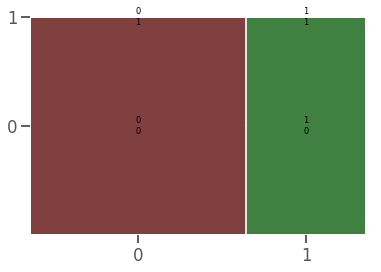

In [65]:
from statsmodels.graphics.mosaicplot import mosaic

conf_matrix = elevator_vs_size.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [66]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.6458211143695015
sensitivity:  0.0
specificity:  1.0
